# Principal Component Analysis
As we have explored in the past, if we have too many dimensions, this can lead to our data being too spread out, leading to potentially inaccurate results. Thus, we need to find a way to reduce these dimensions and only use the attributes with the most importance. This is where Principal Component Analysis comes in. Principal Component Analysis is again another example of unsupervised machine learning. It is able to analyze multiple different attributes to determine the attributes with the highest variation. We will then take these principal components and see if we can improve classification of wine.

### Import Libraries and Datasets
As usual, let's import our necessary libraries and upload relevant datasets. For this module, we will be analyzing both the red wine and white wine dataset to see which attributes are most important in determining the quality of wine.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

red = pd.read_csv("winequality-red.csv")
white = pd.read_csv("winequality-white.csv")

del red["High_Quality"]
del red["type"] 

del white["type"] 

X1 = red.drop(["quality"], axis = 1).to_numpy()
y1 = red["quality"].to_numpy()

X2 = white.drop(["quality"], axis = 1).to_numpy()
y2 = white["quality"].to_numpy()

### Standarize Data
We now need to center and scale our data. This is because when finding the variation of different attributes, if we didn't scale our data, some could have have variance simple because the numbers are bigger. Thus, we need all the data points to be within the same range so that we can accurately measure variance. We scale it by subtract x by its mean.

In [3]:
A1 = X1 - X1.mean(axis = 0)
A2 = X2 - X2.mean(axis = 0)

### Compute Singular Value Decomposition
In order to figure out the attribute importance, we also have to calculate the SVD of our now-scaled matrices. We can do that below. We can also put our sigmas into diagonal form.

In [4]:
U1, sigma1, Vt1 = np.linalg.svd(A1, full_matrices=False) #calculate SVD
U2, sigma2, Vt2 = np.linalg.svd(A2, full_matrices=False) #calculate SVD
sigma_mat1 = np.diag(sigma1) #put sigma into diag
sigma_mat2 = np.diag(sigma2) #put sigma into diag

### Project Data onto Two Most Important Attributes
By the nature of SVD, the attributes are listed in order of importance based on the columns of V. Thus, we take the first two columns of V (or Vt transposed), which also are the eigenvectors, and project A upon these two components.

In [6]:
W1 = Vt1.T[:, :2] #first two singular vectors
X_reduced1 = A1.dot(W1)

W2 = Vt2.T[:, :2] #first two singular vectors
X_reduced2 = A2.dot(W2)

### Plot Red Wine
Let's now plot the various qualities of wine on the two most important components for red wine.

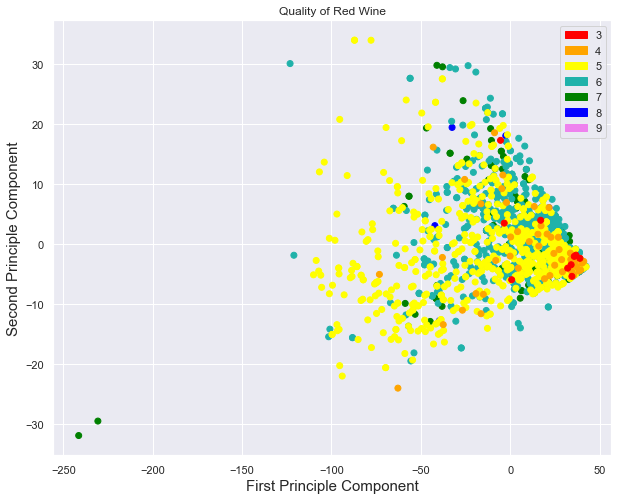

In [7]:
def colors1(y1):
    if y1 == 3:
        return "red"
    elif y1 == 4:
        return "orange"
    elif y1 == 5:
        return "yellow"
    elif y1 == 6:
        return "lightseagreen"
    elif y1 == 7:
        return "green"
    elif y1 == 8:
        return "blue"
    else:
        return "violet"

c1 = [colors1(label) for label in y1]

plt.figure(figsize = (10, 8))
plt.scatter(X_reduced1[:, 0], X_reduced1[:, 1], c = c1)
plt.xlabel("First Principle Component", fontsize = 15)
plt.ylabel("Second Principle Component", fontsize = 15)

#Plot legend
import matplotlib.patches as mpatches
Q3 = mpatches.Patch(color='red', label='3')
Q4 = mpatches.Patch(color='orange', label='4')
Q5 = mpatches.Patch(color='yellow', label='5')
Q6 = mpatches.Patch(color='lightseagreen', label='6')
Q7 = mpatches.Patch(color='green', label='7')
Q8 = mpatches.Patch(color='blue', label='8')
Q9 = mpatches.Patch(color='violet', label='9')
plt.legend(handles=[Q3, Q4, Q5, Q6, Q7, Q8, Q9])
plt.grid(True)
plt.title("Quality of Red Wine")
plt.show()


### Plot Quality of White Wine
We can also do the same for white wine.

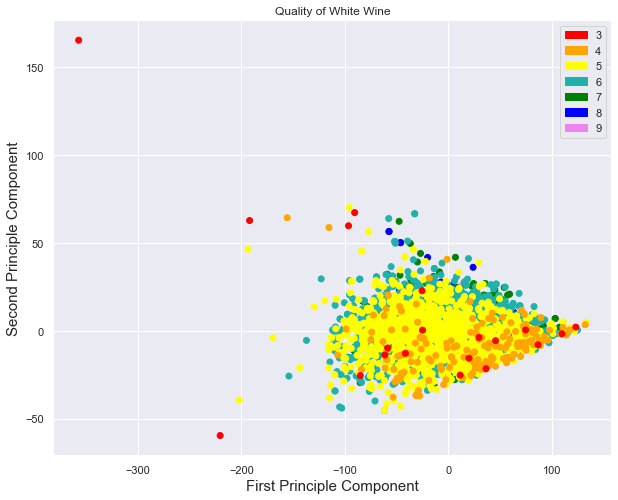

In [8]:
def colors2(y2):
    if y2 == 3:
        return "red"
    elif y2 == 4:
        return "orange"
    elif y2 == 5:
        return "yellow"
    elif y2 == 6:
        return "lightseagreen"
    elif y2 == 7:
        return "green"
    elif y2 == 8:
        return "blue"
    else:
        return "violet"

c2 = [colors2(label) for label in y2]
plt.figure(figsize = (10, 8))
plt.scatter(X_reduced2[:, 0], X_reduced2[:, 1], c = c2)
plt.xlabel("First Principle Component", fontsize = 15)
plt.ylabel("Second Principle Component", fontsize = 15)

#Plot legend
import matplotlib.patches as mpatches
Q3 = mpatches.Patch(color='red', label='3')
Q4 = mpatches.Patch(color='orange', label='4')
Q5 = mpatches.Patch(color='yellow', label='5')
Q6 = mpatches.Patch(color='lightseagreen', label='6')
Q7 = mpatches.Patch(color='green', label='7')
Q8 = mpatches.Patch(color='blue', label='8')
Q9 = mpatches.Patch(color='violet', label='9')
plt.legend(handles=[Q3, Q4, Q5, Q6, Q7, Q8, Q9])
plt.grid(True)
plt.title("Quality of White Wine")
plt.show()


### Principal Component Analysis with Scikit-Learn
We can also perform Principal Component Analysis with Scikit-Learn. We first start by standardizing our data. As we can see, Scikit-Learn also has a method of scaling our data.

In [10]:
from sklearn import preprocessing
scaled_X1 = preprocessing.scale(X1)
scaled_X2 = preprocessing.scale(X2)

### Run Principal Component Analysis
Now let's run Principal Component Analysis using Scikit-Learn. After running PCA, we can also display the percent variation of both red and white wine. Percent variation shows what percentage of the variance comes from each component. As we can see, for both the red and white wine, the first principal component accounts for roughly 28-29% of the variation, which is a decent amount. By being able to see the variation, we can determine which components to be most important (and how important) for training. 

In [13]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_X1) #fit to scaled X
variance1 = pca.explained_variance_ratio_
components1 = pca.components_

pca.fit(scaled_X2) #fit to scaled X
variance2 = pca.explained_variance_ratio_
components2 = pca.components_

per_var1 = np.round(variance1*100, 2)
print(f"per_var red wine = {per_var1} \n")

per_var2 = np.round(variance2*100, 2)
print(f"per_var white wine= {per_var2} \n")

per_var red wine = [28.17 17.51 14.1  11.03  8.72  6.    5.31  3.85  3.13  1.65  0.54] 

per_var white wine= [29.29 14.32 11.11  9.26  8.85  8.53  6.61  5.45  3.76  2.63  0.19] 



### Plot Percent Variation
We can also plot the variation for both red and white wine to see it more visually. This plot is also called a Scree Plot. We can see that the variation for red wine drops pretty quickly and more exponentially, but for white wine, it drops quickly, slows, then drops quickly again.

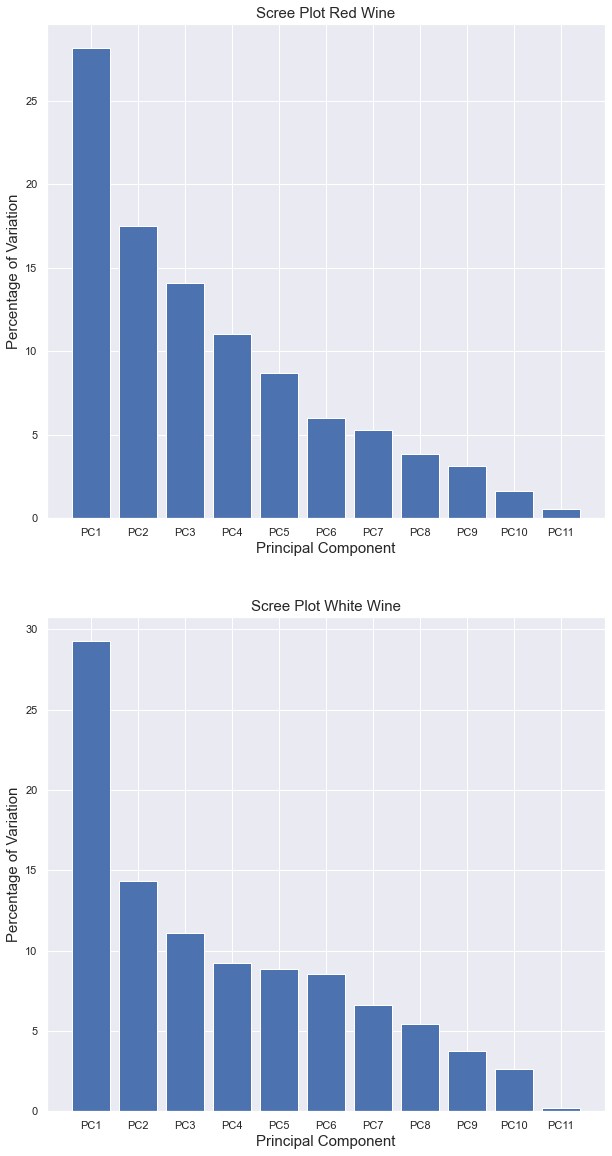

In [15]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,20))

labels = [f"PC{i}" for i in range(1,12)]

ax1.bar(x = range(1, 12), height = per_var1, tick_label = labels)
ax1.set_xlabel('Principal Component', fontsize = 15)
ax1.set_ylabel('Percentage of Variation', fontsize = 15)
ax1.set_title('Scree Plot Red Wine', fontsize = 15)

ax2.bar(x = range(1, 12), height = per_var2, tick_label = labels)
ax2.set_xlabel('Principal Component', fontsize = 15)
ax2.set_ylabel('Percentage of Variation', fontsize = 15)
ax2.set_title('Scree Plot White Wine', fontsize = 15)
plt.show()

### Find components of each Principal Component
We can also analyze the components that make up each principal component in the dataframe below. For instance,

 PC1 = 0.489 * total_sulfur_dioxide - 0.111 * alcohol - 0.123 * sulphates -0.230 * free_sulfur_dioxide...

This dataframe below specifically shows the components for red wine.

In [16]:
features = list(set(red.columns) - {"quality"})

pd.DataFrame(data = components1, columns = labels, index = features)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
volatile_acidity,0.489314,-0.238584,0.463632,0.146107,0.212247,-0.036158,0.023575,0.395353,-0.438520,0.242921,-0.113232
density,-0.110503,0.274930,-0.151791,0.272080,0.148052,0.513567,0.569487,0.233575,0.006711,-0.037554,-0.386181
chlorides,-0.123302,-0.449963,0.238247,0.101283,-0.092614,0.428793,0.322415,-0.338871,0.057697,0.279786,0.471673
alcohol,-0.229617,0.078960,-0.079418,-0.372793,0.666195,-0.043538,-0.034577,-0.174500,-0.003788,0.550872,-0.122181
residual_sugar,-0.082614,0.218735,-0.058573,0.732144,0.246501,-0.159152,-0.222465,0.157077,0.267530,0.225962,0.350681
total_sulfur_dioxide,0.101479,0.411449,0.069593,0.049156,0.304339,-0.014000,0.136308,-0.391152,-0.522116,-0.381263,0.361645
citric_acid,-0.350227,-0.533735,0.105497,0.290663,0.370413,-0.116596,-0.093662,-0.170481,-0.025138,-0.447469,-0.327651
pH,-0.177595,-0.078775,-0.377516,0.299845,-0.357009,-0.204781,0.019036,-0.239223,-0.561391,0.374604,-0.217626
free_sulfur_dioxide,-0.194021,0.129110,0.381450,-0.007523,-0.111339,-0.635405,0.592116,-0.020719,0.167746,0.058367,-0.037603
fixed_acidity,-0.249523,0.365925,0.621677,0.092872,-0.217671,0.248483,-0.370750,-0.239990,-0.010970,0.112320,-0.303015


### Principal Component Breakdown White Wine
We can also look at the principal component breakdown for white wine.

In [17]:
features = list(set(white.columns) - {"quality"})

pd.DataFrame(data = components2, columns = labels, index = features)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
volatile_acidity,0.157218,0.005089,0.144050,0.427408,0.212011,0.300334,0.406652,0.511524,-0.128832,0.043379,-0.437238
density,-0.587558,0.051728,-0.345295,0.008749,-0.008800,0.290355,0.244032,0.006297,0.581344,0.222695,-0.035569
chlorides,0.121368,-0.590971,0.504397,-0.214320,-0.102367,0.279410,0.124375,-0.129203,0.126672,0.433244,0.105903
alcohol,0.018584,0.274115,0.148514,-0.273765,0.710712,-0.305585,-0.060456,-0.022061,0.097753,0.442060,-0.141079
residual_sugar,0.251048,0.642617,0.053905,0.011391,-0.328628,0.176912,0.293010,-0.084588,-0.119826,0.400585,0.337419
total_sulfur_dioxide,-0.103531,0.122338,0.132097,-0.289447,0.395821,0.494494,0.276320,-0.327651,-0.193341,-0.481039,0.139284
citric_acid,-0.197849,0.269355,0.705481,0.212760,-0.079484,-0.166779,-0.067730,0.110385,0.427313,-0.308562,0.128922
pH,0.588355,0.028373,-0.152287,-0.388186,-0.100151,-0.081799,0.247314,0.069026,0.533881,-0.270394,-0.195859
free_sulfur_dioxide,0.330523,-0.145910,-0.202011,0.408969,0.393535,0.144073,-0.154540,0.087888,0.261298,-0.011698,0.621091
fixed_acidity,0.131705,0.223722,0.037351,-0.094468,-0.053374,0.567451,-0.709120,0.068374,0.110733,0.057708,-0.272609


### Transform Data
We can also transform all of our data points to fit the principal components.

In [18]:
# we use pca.transform to see how our data looks like in the new coordinate system

# this will be used later to plot our data in the first two coordinates PC1, PC2

pca_data1 = pca.transform(scaled_X1)
pca_data2 = pca.transform(scaled_X2)

pca_df1 = pd.DataFrame(pca_data1, columns = labels)
pca_df2 = pd.DataFrame(pca_data2, columns = labels)

print("Red Wine")
display(pca_df1)

print("White Wine")
display(pca_df2)

Red Wine


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.572565,0.003147,1.593840,-0.208811,0.504000,-0.793873,0.734671,-1.258663,1.593825,-0.613008,0.628589
1,0.131857,-1.732302,0.820303,-0.677146,0.336035,-2.069897,0.754461,-1.610630,2.526993,-0.715607,-0.405735
2,-2.895740,2.657440,-0.344580,0.215078,2.463878,0.581861,0.309340,0.039506,0.167800,-1.384547,-0.575116
3,1.227087,-4.090913,1.800135,0.416285,0.174718,-1.113233,-0.468627,-0.430228,-0.770321,-0.005161,0.624704
4,0.163126,-2.542068,0.329788,-0.115539,1.488066,-1.043851,2.033850,-0.987301,2.504610,-0.444904,0.656381
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.879206,0.785125,-5.020603,2.023289,2.214383,1.159404,1.718635,0.859057,0.123176,1.253177,-0.630476
1595,-0.480775,0.761178,-2.299625,2.942750,-1.144663,2.428945,-0.748364,-0.094875,0.522621,0.503015,-0.477346
1596,0.006976,0.881068,-2.262250,-0.117369,1.191352,0.464803,0.027362,0.376507,-1.038524,0.832651,0.151583
1597,0.242369,0.491215,-3.132914,-0.200687,0.039904,-1.396758,1.167835,-0.569198,0.653464,0.217128,-0.586716


White Wine


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,1.067121,-2.097275,0.322782,-0.373569,0.434008,-1.128159,0.648668,1.295322,0.886768,0.398405,-0.137306
1,-3.012839,0.872183,0.269928,0.319461,1.188843,-0.866324,0.444340,0.223272,0.315822,0.496508,-0.257439
2,-1.906088,-0.343466,0.891113,-0.336251,0.595722,0.190194,0.236349,0.735824,0.592764,-0.618961,-0.068215
3,-1.864284,0.288228,0.028534,-1.580021,1.232691,1.367234,0.752695,0.311830,0.617899,0.766659,-0.200063
4,-2.242327,-0.358976,1.141992,-0.360240,0.374345,0.557490,1.574651,0.569182,0.748317,-0.078748,-0.021930
...,...,...,...,...,...,...,...,...,...,...,...
4893,1.072722,3.583773,-0.176879,-0.761852,-1.872641,0.394243,0.130610,-0.243066,-1.568329,0.862143,0.519801
4894,2.763476,-1.082906,1.405484,-2.861549,2.011884,3.241277,-2.287881,0.838959,1.391579,1.701992,-0.165866
4895,-1.761687,0.587748,0.276651,0.441243,-1.045557,0.292336,0.650953,0.467845,-0.079641,-0.092011,0.062830
4896,1.701585,0.536334,-0.106187,-0.075159,-0.116483,-0.426132,0.383178,-0.493537,1.092603,-0.289954,-0.147879


### Add Labels
Let's also add the labels (quality) for all of our data points.

In [19]:
projected_df1 = pd.concat([pca_df1, red.quality], axis = 1)
projected_df2 = pd.concat([pca_df2, white.quality], axis = 1)

print("Red Wine")
display(projected_df1)

print("White Wine")
display(projected_df2)

Red Wine


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,quality
0,-0.572565,0.003147,1.593840,-0.208811,0.504000,-0.793873,0.734671,-1.258663,1.593825,-0.613008,0.628589,8
1,0.131857,-1.732302,0.820303,-0.677146,0.336035,-2.069897,0.754461,-1.610630,2.526993,-0.715607,-0.405735,8
2,-2.895740,2.657440,-0.344580,0.215078,2.463878,0.581861,0.309340,0.039506,0.167800,-1.384547,-0.575116,8
3,1.227087,-4.090913,1.800135,0.416285,0.174718,-1.113233,-0.468627,-0.430228,-0.770321,-0.005161,0.624704,8
4,0.163126,-2.542068,0.329788,-0.115539,1.488066,-1.043851,2.033850,-0.987301,2.504610,-0.444904,0.656381,8
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.879206,0.785125,-5.020603,2.023289,2.214383,1.159404,1.718635,0.859057,0.123176,1.253177,-0.630476,3
1595,-0.480775,0.761178,-2.299625,2.942750,-1.144663,2.428945,-0.748364,-0.094875,0.522621,0.503015,-0.477346,3
1596,0.006976,0.881068,-2.262250,-0.117369,1.191352,0.464803,0.027362,0.376507,-1.038524,0.832651,0.151583,3
1597,0.242369,0.491215,-3.132914,-0.200687,0.039904,-1.396758,1.167835,-0.569198,0.653464,0.217128,-0.586716,3


White Wine


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,quality
0,1.067121,-2.097275,0.322782,-0.373569,0.434008,-1.128159,0.648668,1.295322,0.886768,0.398405,-0.137306,9
1,-3.012839,0.872183,0.269928,0.319461,1.188843,-0.866324,0.444340,0.223272,0.315822,0.496508,-0.257439,9
2,-1.906088,-0.343466,0.891113,-0.336251,0.595722,0.190194,0.236349,0.735824,0.592764,-0.618961,-0.068215,9
3,-1.864284,0.288228,0.028534,-1.580021,1.232691,1.367234,0.752695,0.311830,0.617899,0.766659,-0.200063,9
4,-2.242327,-0.358976,1.141992,-0.360240,0.374345,0.557490,1.574651,0.569182,0.748317,-0.078748,-0.021930,9
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,1.072722,3.583773,-0.176879,-0.761852,-1.872641,0.394243,0.130610,-0.243066,-1.568329,0.862143,0.519801,3
4894,2.763476,-1.082906,1.405484,-2.861549,2.011884,3.241277,-2.287881,0.838959,1.391579,1.701992,-0.165866,3
4895,-1.761687,0.587748,0.276651,0.441243,-1.045557,0.292336,0.650953,0.467845,-0.079641,-0.092011,0.062830,3
4896,1.701585,0.536334,-0.106187,-0.075159,-0.116483,-0.426132,0.383178,-0.493537,1.092603,-0.289954,-0.147879,3


### Add Color
We can also add the corresponding colors

In [20]:
projected_df1["color"] = c1
projected_df2["color"] = c2

print("Red Wine")
display(projected_df1)

print("White Wine")
display(projected_df2)

Red Wine


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,quality,color
0,-0.572565,0.003147,1.593840,-0.208811,0.504000,-0.793873,0.734671,-1.258663,1.593825,-0.613008,0.628589,8,blue
1,0.131857,-1.732302,0.820303,-0.677146,0.336035,-2.069897,0.754461,-1.610630,2.526993,-0.715607,-0.405735,8,blue
2,-2.895740,2.657440,-0.344580,0.215078,2.463878,0.581861,0.309340,0.039506,0.167800,-1.384547,-0.575116,8,blue
3,1.227087,-4.090913,1.800135,0.416285,0.174718,-1.113233,-0.468627,-0.430228,-0.770321,-0.005161,0.624704,8,blue
4,0.163126,-2.542068,0.329788,-0.115539,1.488066,-1.043851,2.033850,-0.987301,2.504610,-0.444904,0.656381,8,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.879206,0.785125,-5.020603,2.023289,2.214383,1.159404,1.718635,0.859057,0.123176,1.253177,-0.630476,3,red
1595,-0.480775,0.761178,-2.299625,2.942750,-1.144663,2.428945,-0.748364,-0.094875,0.522621,0.503015,-0.477346,3,red
1596,0.006976,0.881068,-2.262250,-0.117369,1.191352,0.464803,0.027362,0.376507,-1.038524,0.832651,0.151583,3,red
1597,0.242369,0.491215,-3.132914,-0.200687,0.039904,-1.396758,1.167835,-0.569198,0.653464,0.217128,-0.586716,3,red


White Wine


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,quality,color
0,1.067121,-2.097275,0.322782,-0.373569,0.434008,-1.128159,0.648668,1.295322,0.886768,0.398405,-0.137306,9,violet
1,-3.012839,0.872183,0.269928,0.319461,1.188843,-0.866324,0.444340,0.223272,0.315822,0.496508,-0.257439,9,violet
2,-1.906088,-0.343466,0.891113,-0.336251,0.595722,0.190194,0.236349,0.735824,0.592764,-0.618961,-0.068215,9,violet
3,-1.864284,0.288228,0.028534,-1.580021,1.232691,1.367234,0.752695,0.311830,0.617899,0.766659,-0.200063,9,violet
4,-2.242327,-0.358976,1.141992,-0.360240,0.374345,0.557490,1.574651,0.569182,0.748317,-0.078748,-0.021930,9,violet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,1.072722,3.583773,-0.176879,-0.761852,-1.872641,0.394243,0.130610,-0.243066,-1.568329,0.862143,0.519801,3,red
4894,2.763476,-1.082906,1.405484,-2.861549,2.011884,3.241277,-2.287881,0.838959,1.391579,1.701992,-0.165866,3,red
4895,-1.761687,0.587748,0.276651,0.441243,-1.045557,0.292336,0.650953,0.467845,-0.079641,-0.092011,0.062830,3,red
4896,1.701585,0.536334,-0.106187,-0.075159,-0.116483,-0.426132,0.383178,-0.493537,1.092603,-0.289954,-0.147879,3,red


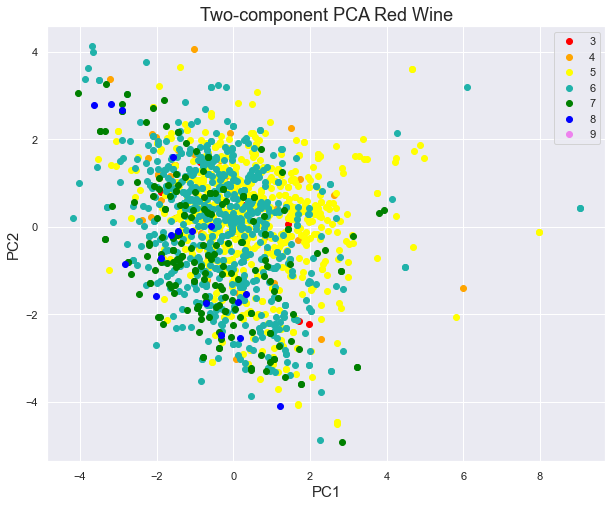

In [21]:
targets = [3, 4, 5, 6, 7, 8, 9]
colors = ["red", "orange", "yellow", "lightseagreen", "green", "blue", "violet"]

plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df1 = projected_df1[projected_df1['quality'] == target]
    plt.scatter(temp_df1["PC1"], 
                temp_df1["PC2"],
                c = color)
    
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('Two-component PCA Red Wine', fontsize = 18)
plt.legend(targets)
plt.show()

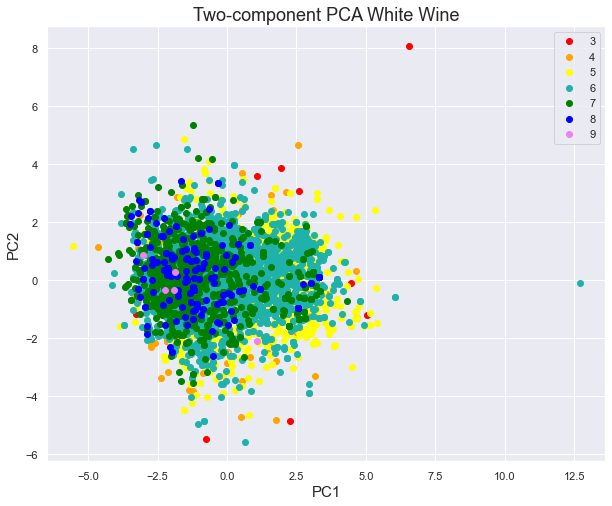

In [22]:
plt.figure(figsize = (10, 8))

for target, color in zip(targets, colors):
    temp_df2 = projected_df2[projected_df2['quality'] == target]
    plt.scatter(temp_df2["PC1"], 
                temp_df2["PC2"],
                c = color)
    
plt.xlabel('PC1', fontsize = 15)
plt.ylabel('PC2', fontsize = 15)
plt.title('Two-component PCA White Wine', fontsize = 18)
plt.legend(targets)
plt.show()

### Random Forests and Bagging
Just for fun, let's see what happens when we run random forests on the two principal components of white wine. First, we split our data as usual.

In [23]:
pca_df2 = pd.DataFrame(pca_data2, columns = labels).to_numpy()
pca_df2 = pca_df2[:,:2]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_df2, 
                                                    y2,
                                                    test_size = 0.4, 
                                                    random_state = 2)

### Perform Random Forests
Let's run random forests on our scaled data and analyze the classification report. Although the accuracy isn't higher than that of all the data, it looks pretty good! Using just two principal components, we can get our accuracy to about 50%!

In [25]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(max_depth = 5, n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1,
                            random_state = 42)
forest_clf.fit(X_train, y_train)
forest_y_pred = forest_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        65
           5       0.50      0.33      0.40       583
           6       0.47      0.82      0.60       870
           7       0.42      0.05      0.09       360
           8       0.00      0.00      0.00        72
           9       0.00      0.00      0.00         3

    accuracy                           0.47      1960
   macro avg       0.20      0.17      0.16      1960
weighted avg       0.43      0.47      0.40      1960
 



C:\Users\wwang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wwang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wwang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Perform Bagging
We can also do the same with bagging. Again, 50% accuracy is really good!

In [26]:
from sklearn.tree import DecisionTreeClassifier #use decision tree
from sklearn.ensemble import BaggingClassifier #use bagging classifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=5, random_state=42), 
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)

print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Bagging Classification Report
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        65
           5       0.49      0.30      0.37       583
           6       0.46      0.81      0.59       870
           7       0.42      0.08      0.13       360
           8       0.00      0.00      0.00        72
           9       0.00      0.00      0.00         3

    accuracy                           0.46      1960
   macro avg       0.20      0.17      0.16      1960
weighted avg       0.43      0.46      0.40      1960
 



C:\Users\wwang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wwang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\wwang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Takeaways
As we can see, principal component analysis is a great way to preprocess data and perform dimensionality reduction.